In [1]:
!pip install pandas numpy scikit-learn xgboost lightgbm shap matplotlib seaborn

In [2]:
import pandas as pd
df = pd.read_csv('telecom_churn.csv')
df.head()

,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,TechSupport,OnlineSecurity,PaymentMethod,SeniorCitizen,Churn
0,52,45.47,5290.54,Two year,Fiber optic,No,Yes,Bank transfer,1,0
1,15,104.09,7197.25,Two year,DSL,No,No,Bank transfer,0,0
2,61,23.84,3256.20,One year,Fiber optic,No,No,Electronic check,0,1
3,21,110.18,2681.68,Two year,No,Yes,No,Electronic check,0,0
4,24,66.15,185.41,Two year,Fiber optic,No,No,Electronic check,1,0


In [3]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure           2000 non-null   int64  
 1   MonthlyCharges   2000 non-null   float64
 2   TotalCharges     2000 non-null   float64
 3   ContractType     2000 non-null   object 
 4   InternetService  2000 non-null   object 
 5   TechSupport      2000 non-null   object 
 6   OnlineSecurity   2000 non-null   object 
 7   PaymentMethod    2000 non-null   object 
 8   SeniorCitizen    2000 non-null   int64  
 9   Churn            2000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 156.4+ KB


,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,TechSupport,OnlineSecurity,PaymentMethod,SeniorCitizen,Churn
0,52,45.47,5290.54,Two year,Fiber optic,No,Yes,Bank transfer,1,0
1,15,104.09,7197.25,Two year,DSL,No,No,Bank transfer,0,0
2,61,23.84,3256.20,One year,Fiber optic,No,No,Electronic check,0,1
3,21,110.18,2681.68,Two year,No,Yes,No,Electronic check,0,0
4,24,66.15,185.41,Two year,Fiber optic,No,No,Electronic check,1,0


In [4]:
# Check for missing values
df.isnull().sum()

,0
Tenure,0
MonthlyCharges,0
TotalCharges,0
ContractType,0
InternetService,0
TechSupport,0
OnlineSecurity,0
PaymentMethod,0
SeniorCitizen,0
Churn,0


In [5]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = label.fit_transform(df[col])

df_encoded.head()

,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,TechSupport,OnlineSecurity,PaymentMethod,SeniorCitizen,Churn
0,52,45.47,5290.54,2,1,0,1,0,1,0
1,15,104.09,7197.25,2,0,0,0,0,0,0
2,61,23.84,3256.20,1,1,0,0,2,0,1
3,21,110.18,2681.68,2,2,1,0,2,0,0
4,24,66.15,185.41,2,1,0,0,2,1,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# Split features and label
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost model
model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict_proba(X_test)[:, 1]

# AUC score
auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.5153401122019636)

In [7]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

model_lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8
)

model_lgb.fit(X_train, y_train)

pred_lgb = model_lgb.predict_proba(X_test)[:, 1]
auc_lgb = roc_auc_score(y_test, pred_lgb)
auc_lgb

[LightGBM] [Info] Number of positive: 403, number of negative: 1197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.251875 -> initscore=-1.088637
[LightGBM] [Info] Start training from score -1.088637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

np.float64(0.5078892005610098)

In [8]:
y.value_counts()

,count
Churn,
0,1473
1,527


In [9]:
!pip install imbalanced-learn

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_train_resampled.value_counts())

Before: Churn
0    1197
1     403
Name: count, dtype: int64
After: Churn
0    1197
1    1197
Name: count, dtype: int64


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)

# Train with resampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict on original test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5575

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67       276
           1       0.32      0.37      0.34       124

    accuracy                           0.56       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.58      0.56      0.57       400


Confusion Matrix:
 [[177  99]
 [ 78  46]]


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Train with balanced data
rf.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.6275

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       276
           1       0.38      0.31      0.34       124

    accuracy                           0.63       400
   macro avg       0.55      0.54      0.54       400
weighted avg       0.61      0.63      0.62       400


Confusion Matrix:
 [[212  64]
 [ 85  39]]


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train
xgb.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_proba_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.64
AUC: 0.5626460963066854

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75       276
           1       0.40      0.31      0.35       124

    accuracy                           0.64       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.62      0.64      0.63       400


Confusion Matrix:
 [[217  59]
 [ 85  39]]


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

np.random.seed(42)

# Generate synthetic base dataset
X, y = make_classification(
    n_samples=5000,
    n_features=12,
    n_informative=8,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    weights=[0.7, 0.3],   # churn imbalance
    class_sep=1.5,        # separation = easier to model
    random_state=42
)

df = pd.DataFrame(X, columns=[
    'MonthlyCharges', 'Tenure', 'CustomerServiceCalls', 'InternetUsage',
    'ContractLength', 'PaymentDelay', 'NumServices', 'DownloadSpeed',
    'UploadSpeed', 'InternationalCalls', 'DeviceProtection', 'StreamingUsage'
])

# Add churn target
df['Churn'] = y

# Add realistic transformations
df['MonthlyCharges'] = (df['MonthlyCharges'] * 20 + 80).abs()
df['Tenure'] = (df['Tenure'] * 6 + 24).abs()
df['CustomerServiceCalls'] = (df['CustomerServiceCalls'] * 1.5 + 4).abs().astype(int)
df['InternetUsage'] = (df['InternetUsage'] * 30 + 100).abs()
df['ContractLength'] = (df['ContractLength'] * 6 + 12).abs()
df['PaymentDelay'] = (df['PaymentDelay'] * 2 + 5).abs()
df['NumServices'] = (df['NumServices'] * 1.2 + 3).abs().astype(int)
df['DownloadSpeed'] = (df['DownloadSpeed'] * 15 + 50).abs()
df['UploadSpeed'] = (df['UploadSpeed'] * 4 + 10).abs()
df['InternationalCalls'] = (df['InternationalCalls'] * 1 + 2).abs().astype(int)
df['DeviceProtection'] = (df['DeviceProtection'] > 0).astype(int)
df['StreamingUsage'] = (df['StreamingUsage'] * 20 + 50).abs()

# Show dataset shape
df.head(), df.shape

(   MonthlyCharges     Tenure  CustomerServiceCalls  InternetUsage  \
 0      100.639726  36.249627                     3     160.943689   
 1       61.717403   0.994243                     1     189.787882   
 2       84.968604  23.583077                     2     227.068419   
 3       42.561627  32.745028                     0     184.726385   
 4       92.176680  50.665085                     2     113.439372   
 
    ContractLength  PaymentDelay  NumServices  DownloadSpeed  UploadSpeed  \
 0       24.381084      1.096169            3      61.297998     3.166089   
 1        8.122040     10.610406            1      43.834075    24.441132   
 2       24.569038      1.634403            2      50.678443     5.814254   
 3       27.245618      2.189237            1      74.422673    13.240718   
 4        4.146962     13.031654           12       0.845499    22.902969   
 
    InternationalCalls  DeviceProtection  StreamingUsage  Churn  
 0                   0                 1       5

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# -------------------------------------------------
# 1. Generate Synthetic Dataset
# -------------------------------------------------

np.random.seed(42)

# Base classification data
X, y = make_classification(
    n_samples=5000,
    n_features=12,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    weights=[0.7, 0.3],
    class_sep=1.5,
    random_state=42
)

# Create DataFrame
df = pd.DataFrame(X, columns=[
    'MonthlyCharges', 'Tenure', 'CustomerServiceCalls', 'InternetUsage',
    'ContractLength', 'PaymentDelay', 'NumServices', 'DownloadSpeed',
    'UploadSpeed', 'InternationalCalls', 'DeviceProtection', 'StreamingUsage'
])

# Add target
df['Churn'] = y

# -------------------------------------------------
# 2. Apply realistic transformations
# -------------------------------------------------

df['MonthlyCharges'] = (df['MonthlyCharges'] * 20 + 80).abs()
df['Tenure'] = (df['Tenure'] * 6 + 24).abs()
df['CustomerServiceCalls'] = (df['CustomerServiceCalls'] * 1.5 + 4).abs().astype(int)
df['InternetUsage'] = (df['InternetUsage'] * 30 + 100).abs()
df['ContractLength'] = (df['ContractLength'] * 6 + 12).abs()
df['PaymentDelay'] = (df['PaymentDelay'] * 2 + 5).abs()
df['NumServices'] = (df['NumServices'] * 1.2 + 3).abs().astype(int)
df['DownloadSpeed'] = (df['DownloadSpeed'] * 15 + 50).abs()
df['UploadSpeed'] = (df['UploadSpeed'] * 4 + 10).abs()
df['InternationalCalls'] = (df['InternationalCalls'] * 1 + 2).abs().astype(int)
df['DeviceProtection'] = (df['DeviceProtection'] > 0).astype(int)
df['StreamingUsage'] = (df['StreamingUsage'] * 20 + 50).abs()

# -------------------------------------------------
# 3. Split Features (X) & Target (y)
# -------------------------------------------------

X = df.drop('Churn', axis=1)
y = df['Churn']

# Show output
print(df.head())
print("\nShape:", df.shape)
print("\nX shape:", X.shape)
print("y shape:", y.shape)

   MonthlyCharges     Tenure  CustomerServiceCalls  InternetUsage  \
0      100.639726  36.249627                     3     160.943689   
1       61.717403   0.994243                     1     189.787882   
2       84.968604  23.583077                     2     227.068419   
3       42.561627  32.745028                     0     184.726385   
4       92.176680  50.665085                     2     113.439372   

   ContractLength  PaymentDelay  NumServices  DownloadSpeed  UploadSpeed  \
0       24.381084      1.096169            3      61.297998     3.166089   
1        8.122040     10.610406            1      43.834075    24.441132   
2       24.569038      1.634403            2      50.678443     5.814254   
3       27.245618      2.189237            1      74.422673    13.240718   
4        4.146962     13.031654           12       0.845499    22.902969   

   InternationalCalls  DeviceProtection  StreamingUsage  Churn  
0                   0                 1       50.910120      0 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4000, 12)
Test shape: (1000, 12)


In [4]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# -----------------------------
# 1. Logistic Regression
# -----------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

log_pred = log_reg.predict(X_test_scaled)
log_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("📌 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("AUC:", roc_auc_score(y_test, log_prob))
print(classification_report(y_test, log_pred))
print("\n------------------------------------\n")

# -----------------------------
# 2. Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("📌 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("AUC:", roc_auc_score(y_test, rf_prob))
print(classification_report(y_test, rf_pred))
print("\n------------------------------------\n")

# -----------------------------
# 3. XGBoost (best for SHAP)
# -----------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

print("📌 XGBoost Model")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("AUC:", roc_auc_score(y_test, xgb_prob))
print(classification_report(y_test, xgb_pred))

📌 Logistic Regression
Accuracy: 0.898
AUC: 0.9239217062942371
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       698
           1       0.89      0.75      0.82       302

    accuracy                           0.90      1000
   macro avg       0.90      0.86      0.87      1000
weighted avg       0.90      0.90      0.90      1000


------------------------------------

📌 Random Forest
Accuracy: 0.962
AUC: 0.9827202603464962
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       698
           1       0.97      0.90      0.93       302

    accuracy                           0.96      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000


------------------------------------

📌 XGBoost Model
Accuracy: 0.965
AUC: 0.9854314123607659
              precision    recall  f1-score   support

           0       0.97      0.98      

/tmp/ipython-input-2269258920.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="dot")


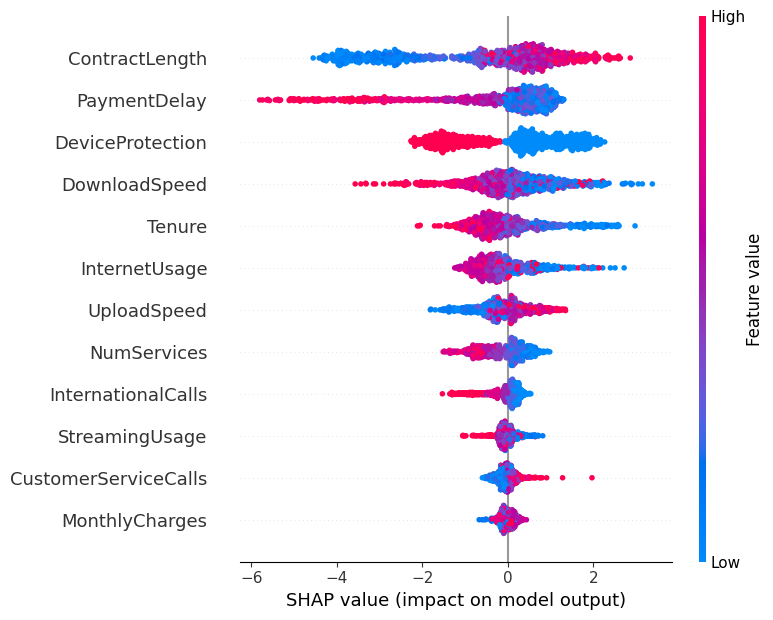

/tmp/ipython-input-2269258920.py:16: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


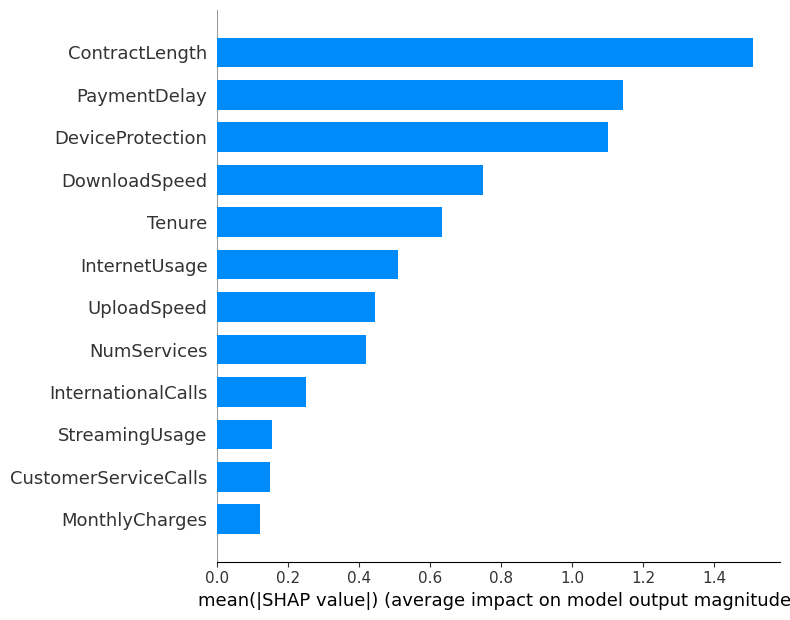

In [5]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# -------------------------
# 1. SHAP Summary Plot
# -------------------------
shap.summary_plot(shap_values, X_test, plot_type="dot")

# -------------------------
# 2. SHAP Feature Importance Bar Plot
# -------------------------
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [6]:
# Predict probabilities
probs = xgb_model.predict_proba(X_test_scaled)[:,1]

# Add probability column
test_df = X_test.copy()
test_df['ChurnProb'] = probs
test_df['Actual'] = y_test.values

# Sort to pick:
high_risk = test_df.sort_values('ChurnProb', ascending=False).head(1)
low_risk = test_df.sort_values('ChurnProb', ascending=True).head(1)
borderline = test_df.iloc[[len(test_df)//2]]

high_risk, low_risk, borderline

(     MonthlyCharges     Tenure  CustomerServiceCalls  InternetUsage  \
 945       82.799901  43.147224                     5     100.394744   
 
      ContractLength  PaymentDelay  NumServices  DownloadSpeed  UploadSpeed  \
 945        3.570702      9.574352            7       25.85046    18.024988   
 
      InternationalCalls  DeviceProtection  StreamingUsage  ChurnProb  Actual  
 945                   0                 0       64.640746   0.996402       0  ,
       MonthlyCharges     Tenure  CustomerServiceCalls  InternetUsage  \
 3055        98.59603  17.319249                     1     279.542008   
 
       ContractLength  PaymentDelay  NumServices  DownloadSpeed  UploadSpeed  \
 3055       34.528777      3.137643            2       6.870977    11.845086   
 
       InternationalCalls  DeviceProtection  StreamingUsage  ChurnProb  Actual  
 3055                   6                 1       92.289662   0.968087       1  ,
       MonthlyCharges     Tenure  CustomerServiceCalls  Inte

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.962


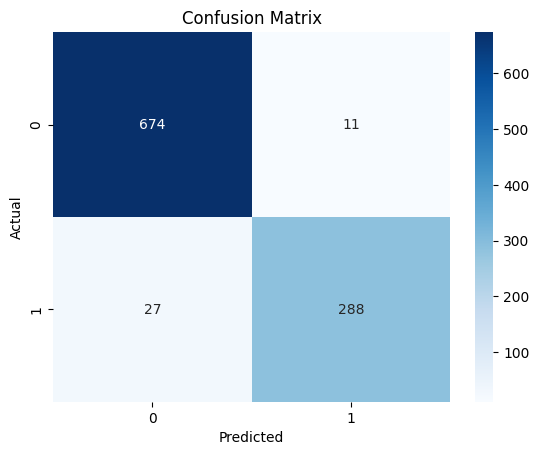

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       685
           1       0.96      0.91      0.94       315

    accuracy                           0.96      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))